## BC Liberal Party Donations in 2016-2017

The BC Liberal Party [disclosed donations](https://www.bcliberals.com/realtime-disclosure/) received during the run-up to the 41st British Columbia general election held May 9, 2017. The data was shared in the form of PDF files containing donations during time intervals of varying length. In this format, the data is not presented for systematic analysis by computer.

I munged the disclosed donations data (with the exception of `2017-Contributions-March-3-2017-Sheet1.pdf` due to a format mismatch) into CSV format and made the collection available as an [open Google docs spreadsheet](https://docs.google.com/spreadsheets/d/1K26qXaaKPaXV4FAmce9W7xX_lCy2RGfDSBO2lwRxfkA/edit?usp=sharing).

This notebook explores the donations data and achieves the following objectives:

* Plot Donations vs. Time. 
* List the top donors by accumulating across all disclosed transactions.
* Identify all donors matching a `string`.

There is one missing disclosure file (due to a format mismatch that I've 

## Set up some tools

In [1]:
import pandas as pd
import numpy as np
from datetime import *
from dateutil.relativedelta import *
import calendar
from dateutil.rrule import *
from dateutil.parser import *
import matplotlib.pyplot as plt 

In [2]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import Bar
from bokeh.models import DatetimeTickFormatter

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
%matplotlib inline

Source data: 
https://docs.google.com/spreadsheets/d/1K26qXaaKPaXV4FAmce9W7xX_lCy2RGfDSBO2lwRxfkA/edit?usp=sharing

## Import the data

In [5]:
## Import multisheet Google doc in as an Excel file.
xl = pd.ExcelFile('https://docs.google.com/spreadsheets/d/1K26qXaaKPaXV4FAmce9W7xX_lCy2RGfDSBO2lwRxfkA/export?format=xlsx&id', 
                )

In [6]:
xl

In [7]:
## List the names of the sheets in the imported Excel file.
## The sheet names correspond to the filenames used to label the disclosed files.
xl.sheet_names

['Copy-of-2016-Contributions-v4',
 '2017-Contributions-June-2',
 '2017-Contributions-May-26-2017',
 '2017-Contributions-May-19',
 '2017-Contributions-May-12',
 '2017-Contributions-May-5',
 '2017-Contributions-April-28-201',
 '2017-Contributions-April-21',
 '2017-Contributions-April-14',
 '2017-Contributions-April-7',
 '2017-Contributions-March-31-201',
 '2017-Contributions-March-23',
 '2017-Contributions-—-March-17-2',
 '2017-Contributions-March-10',
 '2017-Contributions-March-3-2017',
 '2017-Contributions-_-February-2',
 '2017-Contributions-February-17',
 'Copy-of-2017-Contributions-Janu',
 'Sheet1',
 '2017-Contributions-—-February-3',
 '2017-Contributions-—-February-1',
 'Real-Time-Donations-Jan-25V3']

In [8]:
## Make a dictionary of Pandas Dataframes for each sheet
dict = pd.ExcelFile.parse(xl, sheetname=None)

In [9]:
## Merge the data frames in the dictionary into a single large data frame.
## The `df` file contains the list of disclosed BC Liberal Party data in the form of a Pandas Dataframe.
df = pd.concat(dict)

In [10]:
## List descriptive statistics of the collection of all donations.
df.describe()

,Amount
count,28354.000000
mean,647.230235
std,2316.471340
min,0.000000
25%,50.000000
50%,100.000000
75%,300.000000
max,85000.000000


In [11]:
## Number of unique Donor Names
len(df['Donor Name'].unique())

15130

There were 28,534 donation transactions reported. The `mean` donation is \$647.3 with a maximum single donation of \$85,000.

In [12]:
## Calculate total amount donated.
df['Amount'].sum()

18351566.09

### Donation Total: \$18,351,566.09.

## Analyze donations vs. time

In [13]:
## Convert Date to a better Format for ordering
df['datetime'] = pd.to_datetime(df['Date'])

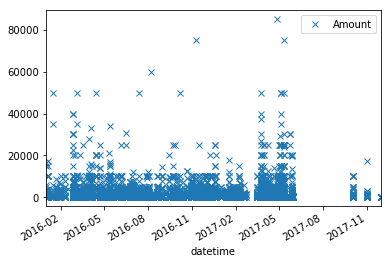

In [14]:
## Plot donations vs. time
df.sort_values(by='datetime').plot(x='datetime',y="Amount", style ="x")

In [15]:
## Accumulate donations vs. time starting from oldest donation
df['cumsum'] = df.sort_values(by='datetime')['Amount'].cumsum()

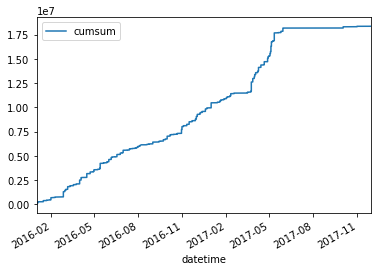

In [16]:
## Accumulated Donations vs. Time
df.plot(x='datetime',y='cumsum')

## Analyze donations based on size

In [17]:
## Restrict attention to donations exceeding a threshold amount
big = df.loc[df['Amount'] > 25000]

In [18]:
## Big Donations as a fraction of total donations
big['Amount'].sum()/df['Amount'].sum()

0.07845379478455182

## Identify donations based on a `string` in 'Donor Name'

In [19]:
def df_filter(name):
    return df.loc[df['Donor Name'].str.contains(name)].sort_values(by='datetime')

In [20]:
## Donations containing `Belk` ordered in time
df_filter('Belk')

Donor Name  \
Copy-of-2016-Contributions-v4   1166     Belkorp Environmental Services Inc.   
                                1172                  Belkorp Industries Inc   
                                21    338446 B.C. Ltd DBA Belkorp Industries   
                                1168     Belkorp Environmental Services Inc.   
                                1169     Belkorp Environmental Services Inc.   
                                1170     Belkorp Environmental Services Inc.   
                                1167     Belkorp Environmental Services Inc.   
                                1171                  Belkorp Industries Inc   
                                1165     Belkorp Environmental Services Inc.   
2017-Contributions-March-31-201 128                     Belkorp Capital Inc.   
                                129                   Belkorp Industries Inc   
2017-Contributions-May-5        106      Belkorp Environmental Services Inc.   
2017-Contributions-May-12       56                    Belkorp Industries Inc   

                                       Amount                 Date   datetime  \
Copy-of-2016-Contributions-v4   1166   5000.0  2016-02-26 00:00:00 2016-02-26   
                                1172   5000.0  2016-03-06 00:00:00 2016-03-06   
                                21    10000.0  2016-04-15 00:00:00 2016-04-15   
                                1168   1200.0  2016-04-22 00:00:00 2016-04-22   
                                1169   7500.0  2016-05-13 00:00:00 2016-05-13   
                                1170   4000.0  2016-07-13 00:00:00 2016-07-13   
                                1167   1000.0  2016-08-04 00:00:00 2016-08-04   
                                1171   7500.0  2016-11-03 00:00:00 2016-11-03   
                                1165   2500.0  2016-12-02 00:00:00 2016-12-02   
2017-Contributions-March-31-201 128    7500.0  2017-03-25 00:00:00 2017-03-25   
                                129    5000.0  2017-03-25 00:00:00 2017-03-25   
2017-Contributions-May-5        106    1000.0  2017-04-28 00:00:00 2017-04-28   
2017-Contributions-May-12       56    12500.0  2017-05-06 00:00:00 2017-05-06   

                                           cumsum  
Copy-of-2016-Contributions-v4   1166   1086150.44  
                                1172   1557977.44  
                                21     2926693.44  
                                1168   3318585.44  
                                1169   3867485.44  
                                1170   5621097.88  
                                1167   6060415.38  
                                1171   8026209.96  
                                1165   9102282.66  
2017-Contributions-March-31-201 128   12272503.51  
                                129   12265003.51  
2017-Contributions-May-5        106   15026729.56  
2017-Contributions-May-12       56    16496873.19

In [21]:
df_filter('Belk')['Amount'].sum()

69700.0

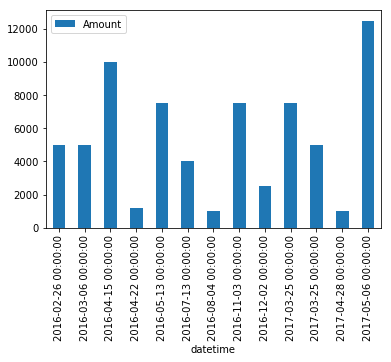

In [22]:
df_filter('Belk').plot(x='datetime',y="Amount", kind='bar')

In [23]:
df_filter('Lindsay Gordon')['Amount'].sum()

1000.0

In [24]:
df_filter('Seaspan')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   13558                Seaspan ULC   1000.0   
                                13559              Seaspan ULC 1      0.0   
                                13560                Seaspan ULC   5000.0   
                                13557  Seaspan International Ltd  15000.0   
                                13561                Seaspan ULC   1050.0   
2017-Contributions-March-31-201 1540                 Seaspan ULC   1000.0   
2017-Contributions-April-21     1130                 Seaspan ULC   1000.0   
2017-Contributions-May-19       392                  Seaspan ULC  15000.0   

                                                      Date   datetime  \
Copy-of-2016-Contributions-v4   13558  2016-01-31 00:00:00 2016-01-31   
                                13559  2016-02-26 00:00:00 2016-02-26   
                                13560  2016-03-31 00:00:00 2016-03-31   
                                13557  2016-05-13 00:00:00 2016-05-13   
                                13561  2016-06-17 00:00:00 2016-06-17   
2017-Contributions-March-31-201 1540   2017-03-25 00:00:00 2017-03-25   
2017-Contributions-April-21     1130   2017-04-14 00:00:00 2017-04-14   
2017-Contributions-May-19       392    2017-05-12 00:00:00 2017-05-12   

                                            cumsum  
Copy-of-2016-Contributions-v4   13558    566212.09  
                                13559    895180.44  
                                13560   2162828.44  
                                13557   4015137.11  
                                13561   4944527.45  
2017-Contributions-March-31-201 1540   11948645.18  
2017-Contributions-April-21     1130   14117743.04  
2017-Contributions-May-19       392    17112870.69

In [25]:
df_filter('Polygon')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   12056  Polygon Homes Ltd    500.0   
                                12057  Polygon Homes Ltd  15000.0   
                                12058  Polygon Homes Ltd  10000.0   
                                12059  Polygon Homes Ltd   1500.0   
2017-Contributions-March-31-201 1360   Polygon Homes Ltd  40000.0   
2017-Contributions-May-12       452    Polygon Homes Ltd  10000.0   

                                                      Date   datetime  \
Copy-of-2016-Contributions-v4   12056  2016-01-29 00:00:00 2016-01-29   
                                12057  2016-04-15 00:00:00 2016-04-15   
                                12058  2016-05-13 00:00:00 2016-05-13   
                                12059  2016-11-15 00:00:00 2016-11-15   
2017-Contributions-March-31-201 1360   2017-03-25 00:00:00 2017-03-25   
2017-Contributions-May-12       452    2017-05-05 00:00:00 2017-05-05   

                                            cumsum  
Copy-of-2016-Contributions-v4   12056    442063.09  
                                12057   3120368.44  
                                12058   3800585.44  
                                12059   8404970.96  
2017-Contributions-March-31-201 1360   12330603.51  
2017-Contributions-May-12       452    15960166.86

In [26]:
df_filter('Car Dealers')

Donor Name  \
Copy-of-2016-Contributions-v4   11088  New Car Dealers Association of BC   
                                11089  New Car Dealers Association of BC   
                                11090  New Car Dealers Association of BC   
                                11092  New Car Dealers Association of BC   
                                11100  New Car Dealers Association of BC   
                                11106  New Car Dealers Association of BC   
                                11093  New Car Dealers Association of BC   
                                11094  New Car Dealers Association of BC   
                                11102  New Car Dealers Association of BC   
                                11096  New Car Dealers Association of BC   
                                11103  New Car Dealers Association of BC   
                                11097  New Car Dealers Association of BC   
                                11098  New Car Dealers Association of BC   
                                11099  New Car Dealers Association of BC   
                                11101  New Car Dealers Association of BC   
                                11095  New Car Dealers Association of BC   
                                11104  New Car Dealers Association of BC   
                                11105  New Car Dealers Association of BC   
                                11091  New Car Dealers Association of BC   
                                11107  New Car Dealers Association of BC   
Sheet1                          718          New Car Dealers Association   
2017-Contributions-—-February-3 378    New Car Dealers Association of BC   
2017-Contributions-March-3-2017 128    New Car Dealers Association of BC   
2017-Contributions-March-10     128    New Car Dealers Association of BC   
2017-Contributions-February-17  128    New Car Dealers Association of BC   
2017-Contributions-_-February-2 86     New Car Dealers Association of BC   
2017-Contributions-March-23     95           New Car Dealers Association   
2017-Contributions-March-31-201 1247         New Car Dealers Association   
2017-Contributions-April-14     503    New Car Dealers Association of BC   
                                504    New Car Dealers Association of BC   
Real-Time-Donations-Jan-25V3    532    New Car Dealers Association of BC   
2017-Contributions-May-12       405    New Car Dealers Association of BC   
                                406    New Car Dealers Association of BC   
2017-Contributions-—-March-17-2 118          New Car Dealers Association   

                                        Amount                 Date  \
Copy-of-2016-Contributions-v4   11088   6000.0  2016-01-15 00:00:00   
                                11089   8500.0  2016-01-22 00:00:00   
                                11090    500.0  2016-01-31 00:00:00   
                                11092   2000.0  2016-02-29 00:00:00   
                                11100   1500.0  2016-03-06 00:00:00   
                                11106   8500.0  2016-03-11 00:00:00   
                                11093   5000.0  2016-03-24 00:00:00   
                                11094  10000.0  2016-03-31 00:00:00   
                                11102    300.0  2016-04-07 00:00:00   
                                11096   1250.0  2016-04-30 00:00:00   
                                11103   7250.0  2016-05-08 00:00:00   
                                11097   2200.0  2016-05-13 00:00:00   
                                11098   3000.0  2016-05-20 00:00:00   
                                11099   1500.0  2016-05-31 00:00:00   
                                11101  30750.0  2016-06-17 00:00:00   
                                11095   5000.0  2016-08-04 00:00:00   
                                11104   9600.0  2016-09-16 00:00:00   
                                11105   2000.0  2016-09-30 00:00:00   
                                11091   3000.0  2016

In [27]:
df_filter('Aquilini')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   774  Aquilini Investment Group LP   2500.0   
                                777  Aquilini Investment Group LP  10000.0   
                                775  Aquilini Investment Group LP   2500.0   
                                776  Aquilini Investment Group LP  10000.0   
                                778  Aquilini Investment Group LP  25000.0   
                                780  Aquilini Investment Group LP   5000.0   
                                781  Aquilini Investment Group LP   1000.0   
                                779  Aquilini Investment Group LP  75000.0   
2017-Contributions-—-February-3 25      Aquilini Investment Group   2500.0   
                                26           Aquilini Investments   2500.0   
2017-Contributions-March-31-201 86   Aquilini Investment Group LP   2400.0   

                                                    Date   datetime  \
Copy-of-2016-Contributions-v4   774  2016-01-01 00:00:00 2016-01-01   
                                777  2016-01-04 00:00:00 2016-01-04   
                                775  2016-01-31 00:00:00 2016-01-31   
                                776  2016-02-26 00:00:00 2016-02-26   
                                778  2016-04-22 00:00:00 2016-04-22   
                                780  2016-10-30 00:00:00 2016-10-30   
                                781  2016-10-31 00:00:00 2016-10-31   
                                779  2016-11-10 00:00:00 2016-11-10   
2017-Contributions-—-February-3 25   2017-01-27 00:00:00 2017-01-27   
                                26   2017-01-27 00:00:00 2017-01-27   
2017-Contributions-March-31-201 86   2017-03-28 00:00:00 2017-03-28   

                                          cumsum  
Copy-of-2016-Contributions-v4   774     39775.00  
                                777    169425.00  
                                775    570152.09  
                                776   1030620.44  
                                778   3187278.44  
                                780   7385829.35  
                                781   7729906.60  
                                779   8179950.96  
2017-Contributions-—-February-3 25   10869645.52  
                                26   10848323.52  
2017-Contributions-March-31-201 86   12777556.71

In [28]:
df_filter('Robert Lee')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4 12819      Robert Lee   1150.0   
                              12820  Robert Lee Ltd   1000.0   
                              12821  Robert Lee Ltd   1000.0   
                              12822  Robert Lee Ltd   1500.0   
2017-Contributions-May-5      905    Robert Lee Ltd   2000.0   
2017-Contributions-May-12     493        Robert Lee  40000.0   

                                                    Date   datetime  \
Copy-of-2016-Contributions-v4 12819  2016-02-26 00:00:00 2016-02-26   
                              12820  2016-02-26 00:00:00 2016-02-26   
                              12821  2016-06-05 00:00:00 2016-06-05   
                              12822  2016-11-28 00:00:00 2016-11-28   
2017-Contributions-May-5      905    2017-04-29 00:00:00 2017-04-29   
2017-Contributions-May-12     493    2017-05-06 00:00:00 2017-05-06   

                                          cumsum  
Copy-of-2016-Contributions-v4 12819   1237240.44  
                              12820   1195290.44  
                              12821   4798212.45  
                              12822   8675241.69  
2017-Contributions-May-5      905    15159249.56  
2017-Contributions-May-12     493    16657423.19

In [29]:
df_filter('Robert J Macdonald')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   12784  Robert J Macdonald    500.0   
                                12789  Robert J Macdonald   1000.0   
                                12788  Robert J Macdonald    500.0   
                                12786  Robert J Macdonald  10000.0   
                                12787  Robert J Macdonald   1000.0   
                                12785  Robert J Macdonald  10000.0   
2017-Contributions-March-31-201 1453   Robert J Macdonald   3000.0   
Real-Time-Donations-Jan-25V3    426    Robert J Macdonald   1000.0   

                                                      Date   datetime  \
Copy-of-2016-Contributions-v4   12784  2016-01-31 00:00:00 2016-01-31   
                                12789  2016-03-11 00:00:00 2016-03-11   
                                12788  2016-05-08 00:00:00 2016-05-08   
                                12786  2016-05-27 00:00:00 2016-05-27   
                                12787  2016-06-28 00:00:00 2016-06-28   
                                12785  2016-11-03 00:00:00 2016-11-03   
2017-Contributions-March-31-201 1453   2017-03-28 00:00:00 2017-03-28   
Real-Time-Donations-Jan-25V3    426    2017-04-01 00:00:00 2017-04-01   

                                            cumsum  
Copy-of-2016-Contributions-v4   12784    525488.09  
                                12789   1865204.44  
                                12788   3578612.44  
                                12786   4355955.11  
                                12787   5310324.52  
                                12785   8064379.96  
2017-Contributions-March-31-201 1453   12721036.71  
Real-Time-Donations-Jan-25V3    426    13225875.04

## Accumulate donations across 'Donor Name' 

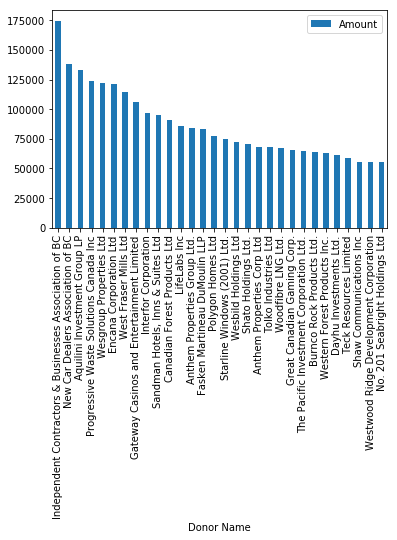

In [30]:
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], 
                                                               ascending=[False]).head(n=30).plot(kind='bar')

In [31]:
## Top 25 Donors 
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], ascending=[False]).head(n=25)

,Amount
Donor Name,
Independent Contractors & Businesses Association of BC,174700.00
New Car Dealers Association of BC,137750.00
Aquilini Investment Group LP,133400.00
Progressive Waste Solutions Canada Inc,123700.00
Wesgroup Properties Ltd,121750.00
Encana Corporation Ltd,121200.00
West Fraser Mills Ltd,114300.00
Gateway Casinos and Entertainment Limited,105738.74
Interfor Corporation,97050.00


In [32]:
## Donation yield from top 100 donors
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], ascending=[False]).head(n=100)['Amount'].sum()

4997161.4699999997

In [33]:
## Fraction of total donations from top 100 donors
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = sum, 
               values = ['Amount']).sort_values(by=['Amount'], ascending=[False]).head(n=100)['Amount'].sum()/df['Amount'].sum()

0.27230163602892815

In [34]:
len(df['Donor Name'].unique())

15130

## Donation Amount by Day

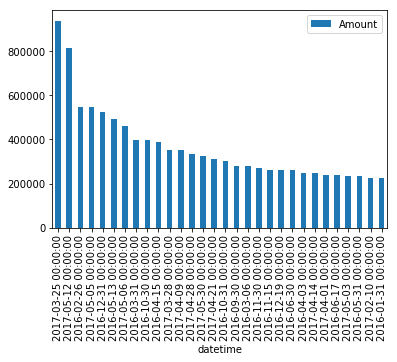

In [35]:
pd.pivot_table(df,index=['datetime'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], 
                                                               ascending=[False]).head(n=30).plot(kind='bar')

In [36]:
pd.pivot_table(df,index=['datetime'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], 
                                                               ascending=[False]).head(n=4)

,Amount
datetime,
2017-03-25,938817.34
2017-05-12,814751.50
2016-02-26,548565.00
2017-05-05,546109.52


The BC Liberal Party received $939K in donations on 2017-03-25.